In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
from scipy.signal import resample

In [3]:
lk=[1,2,3,4,5,6,7,8,9]
lk[:-5]

[1, 2, 3, 4]

In [2]:
main_path = 'C:\\Users\\jagat\\Desktop\\Masters\\Team Project\\UTD\\Inertial/'
data_inertial_lists=os.listdir(main_path)

In [3]:
random_name = data_inertial_lists[4]
random_test = sio.loadmat(main_path+random_name)
random_test_name = random_name.split('/')[-1].split('.')[0]

In [4]:
random_test

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Wed Dec 31 14:59:55 2014',
 '__version__': '1.0',
 '__globals__': [],
 'd_iner': array([[ -0.976318,  -0.185059,   0.304199,  -1.740458,   1.343511,
          -0.70229 ],
        [ -0.981934,  -0.186768,   0.305664,  -1.770992,   1.282443,
          -0.70229 ],
        [ -0.985596,  -0.187256,   0.302246,  -1.770992,   1.251908,
          -0.641221],
        ...,
        [ -0.980957,  -0.122559,   0.345459, -25.862595,  -2.198473,
           8.70229 ],
        [ -0.969482,  -0.13208 ,   0.359863, -19.022901,  -1.496183,
           5.19084 ],
        [ -0.96167 ,  -0.109131,   0.37915 , -18.870229,  -0.977099,
           4.183206]])}

In [5]:
inertial_info = random_test['d_iner']
inertial_info.shape

(172, 6)

In [6]:
acc_x = inertial_info[:,0]
acc_y = inertial_info[:,1]
acc_z = inertial_info[:,2]

gyro_x = inertial_info[:,3]
gyro_y = inertial_info[:,4]
gyro_z = inertial_info[:,5]

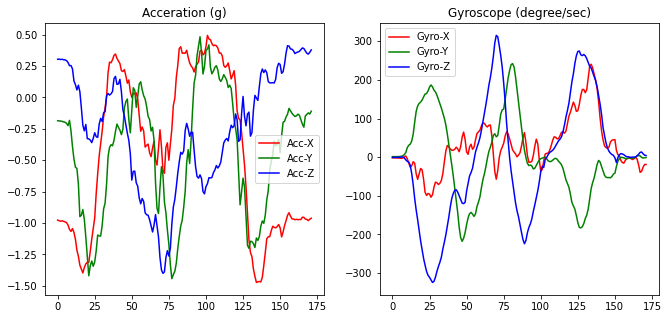

In [7]:
%matplotlib inline
fig, ax = plt.subplots(1,2, sharex=True, figsize = (11,5))
a_1, = ax[0].plot(acc_x, c = 'r')
a_2,= ax[0].plot(acc_y, c = 'g')
a_3, = ax[0].plot(acc_z, c = 'b')
ax[0].set_title('Acceration (g)')
ax[0].legend([a_1,a_2,a_3], ['Acc-X', 'Acc-Y', 'Acc-Z'])

g_1, = ax[1].plot(gyro_x, c = 'r')
g_2, = ax[1].plot(gyro_y, c = 'g')
g_3, = ax[1].plot(gyro_z, c = 'b')
ax[1].set_title('Gyroscope (degree/sec)')

ax[1].legend([g_1,g_2,g_3], ['Gyro-X', 'Gyro-Y', 'Gyro-Z'])


plt.show()
# fig.savefig('inertial_tennis_swing.png')

In [8]:
class_labels = ['swipe left','swipe right','wave','clap','throw','arm cross','basketball shoot','draw x','draw circle CW','draw circle CCW','draw triangle',
               'bowling','boxing','baseball swing','tennis swing','arm curl','tennis serve','push','knock','catch','pickup throw']

In [9]:
def find_action_number(path):
    return int(path.split('/')[-1].split('_')[0][1:])

def get_subject_number(path):
    return int(path.split('/')[-1].split('_')[1][1:])

activities = list(range(1,len(class_labels)+1))
all_activity = []
for act_num in activities:
    activity = []
    for path in data_inertial_lists:
        if find_action_number(path) == act_num:
            activity.append(sio.loadmat(main_path+path)['d_iner'])
    all_activity.append(activity)

activity = all_activity[0]

print(len(activity))
(activity[0].shape)

%matplotlib inline
fig, ax = plt.subplots(12,2, sharex=True, figsize = (20,40))


for i in range(12):
    inertial_info = activity[i]
    acc_x = inertial_info[:,0]
    acc_y = inertial_info[:,1]
    acc_z = inertial_info[:,2]

    gyro_x = inertial_info[:,3]
    gyro_y = inertial_info[:,4]
    gyro_z = inertial_info[:,5]
    
    a_1, = ax[i,0].plot(acc_x, c = 'r')
    a_2,= ax[i,0].plot(acc_y, c = 'g')
    a_3, = ax[i,0].plot(acc_z, c = 'b')
    ax[i,0].set_title('Acceration (g)')
    ax[i,0].legend([a_1,a_2,a_3], ['Acc-X', 'Acc-Y', 'Acc-Z'])

    g_1, = ax[i,1].plot(gyro_x, c = 'r')
    g_2, = ax[i,1].plot(gyro_y, c = 'g')
    g_3, = ax[i,1].plot(gyro_z, c = 'b')
    ax[i,1].set_title('Gyroscope (degree/sec)')

    ax[i,1].legend([g_1,g_2,g_3], ['Gyro-X', 'Gyro-Y', 'Gyro-Z'])

plt.show()

all_activity_resampled = []
for i in range(len(all_activity)):
    for j in range(len(all_activity[i])):
        all_activity_resampled.append(resample(all_activity[i][j], 180))

temp = np.array(all_activity_resampled[0])
plt.plot(temp[:,:3])

all_period = []
for i in range(len(all_activity)):
    for j in range(len(all_activity[i])):
        all_period.append(len(all_activity[i][j]))

all_period = np.array(all_period)
all_period.max(), all_period.min(), all_period.mean()


max_acc = []
min_acc = []
max_gyro = []
min_gyro = []
for i in range(len(all_activity)):
    for j in range(len(all_activity[i])):
        max_acc.append(all_activity[i][j][:,:3].max())
        min_acc.append(all_activity[i][j][:,:3].min())
        max_gyro.append(all_activity[i][j][:,3:].max())
        min_gyro.append(all_activity[i][j][:,3:].min())

max_acc = np.array(max_acc)
min_acc = np.array(min_acc)
max_gyro = np.array(max_gyro)
min_gyro = np.array(min_gyro)
max_acc.max(), min_acc.min(), max_gyro.max(), min_gyro.min()


In [17]:
a=[1,2,3,4,5]
t=2
er=a[t]
print(er)
for i in a[:t] + a[t+1:]:
    print(i)
    print('=')

3
1
=
2
=
4
=
5
=


In [19]:
df_list=['df1','df2','df3','df4','df5']#df1,df2,df3,df4,df5]

for i in range(5):
    test=df_list[i]
    other_dfs=df_list[:i]+ df_list[i+1:]
    

['df2', 'df3', 'df4', 'df5']
['df1', 'df3', 'df4', 'df5']
['df1', 'df2', 'df4', 'df5']
['df1', 'df2', 'df3', 'df5']
['df1', 'df2', 'df3', 'df4']


In [10]:
from sklearn.metrics import confusion_matrix

from tensorflow.keras.utils import to_categorical

from tensorflow.keras.preprocessing import sequence

from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model

from tensorflow.keras.layers import Input
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.layers import UpSampling1D
from tensorflow.keras.layers import Concatenate

from tensorflow.keras.optimizers import Adam

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.callbacks import ModelCheckpoint

In [11]:
# train on subject 1,2,3,4,5
# test on subject 6,7,8
X_train = []
Y_train = []
X_test = []
Y_test = []

resample_len = 180

for path in data_inertial_lists:
        if get_subject_number(path) in [1,2,3,4,5]:
            X_train.append(path)
            Y_train.append(find_action_number(path))
        else:
            X_test.append(path)
            Y_test.append(find_action_number(path))

X_train = [resample(sio.loadmat(main_path+x)['d_iner'], resample_len) for x in X_train]
X_test = [resample(sio.loadmat(main_path+x)['d_iner'], resample_len) for x in X_test]


X_train = np.array(X_train)
X_test = np.array(X_test)

Y_train = to_categorical(np.array(Y_train) - 1)
Y_test = to_categorical(np.array(Y_test) - 1)

#X_train[:,:,3:] = X_train[:,:,3:]/ max(X_train[:,:,3:].max(), abs(X_train[:,:,3:].min()))
#X_train[:,:,:3] = X_train[:,:,:3]/ max(X_train[:,:,:3].max(), abs(X_train[:,:,:3].min()))

#X_test[:,:,3:] = X_test[:,:,3:]/ max(X_test[:,:,3:].max(), abs(X_test[:,:,3:].min()))
#X_test[:,:,:3] = X_test[:,:,:3]/ max(X_test[:,:,:3].max(), abs(X_test[:,:,:3].min()))

X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((419, 180, 6), (419, 21), (252, 180, 6), (252, 21))

def calc_tot_acc(X):
    p,q,r=X.shape
    X_new=np.zeros(shape=(p,q,r+1))
    X_new[:,:,:-1]=X
    for i in range(X.shape[0]):
        X_new[i,:,6]= np.sqrt(X[i,:,0]**2 + X[i,:,1]**2 + X[i,:,2]**2)
    return X_new

X_train=calc_tot_acc(X_train)
X_test=calc_tot_acc(X_test)

In [ ]:
np.random.seed(0)
model_1 = models.Sequential()
model_1.add(layers.Conv3D(10, (5, 5, 2), activation='selu', input_shape=(x2,x3, x4, 1)))
model_1.add(BatchNormalization())
model_1.add(layers.MaxPooling3D((2, 2, 2)))
model_1.add(Dropout(0.5))
model_1.add(layers.ZeroPadding3D(padding=(2, 2, 1)))
model_1.add(layers.Conv3D(20, (3, 3, 2), activation='selu'))
model_1.add(Dropout(0.5))
model_1.add(layers.Conv3D(10, (4, 4, 2), activation='selu'))
model_1.add(layers.TimeDistributed(Flatten()))
#TimeDistributed(Flatten())
model_1.add(Bidirectional(CuDNNLSTM(512)))
model_1.add(Dropout(0.5))
#model.add(layers.Dense(2100, activation='selu'))
#model.add(Dropout(0.5))
model_1.add(layers.Dense(210, activation='sigmoid'))
model_1.add(layers.Dense(21, activation='softmax'))
print(model_1.summary())


model_1.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
LOG_DIR = os.path.join(os.getcwd(), 'logs')

os.chdir(os.getcwd())

tb = TensorBoard(LOG_DIR)
weights_dir = 'weights/' + model_1.name + \
            '-{epoch:02d}-{loss:.2f}'
chkpt = ModelCheckpoint(filepath=weights_dir, monitor='loss', save_best_only=True, save_weights_only=True, mode='auto', save_freq=1)

early_stop = EarlyStopping(monitor='val_acc', min_delta=0, patience=3)

history = model_1.fit(X_all_img_train, Y_train , epochs=15, 
                    batch_size=32, validation_data=(X_all_img_test, Y_test), callbacks=[tb, chkpt])

plot_graphs(history)
scores[7,:]=calc_scores(history)

In [12]:
import tensorflow as tf
from tensorflow.python.ops.numpy_ops import np_config
np_config.enable_numpy_behavior()
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from pyts.image import GramianAngularField
from pyts.image import MarkovTransitionField
from pyts.image import RecurrencePlot

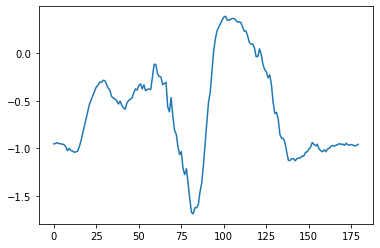

(1, 45, 45)


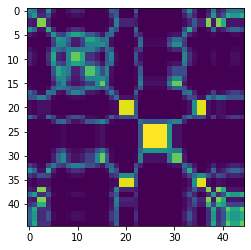

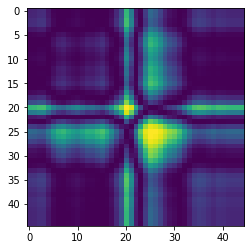

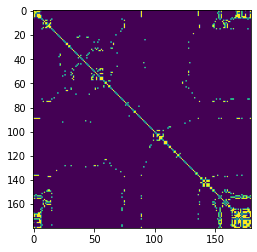

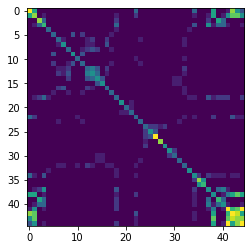

In [13]:
acv=X_train[0,:,0]
plt.plot(acv)
plt.show()
lll=2
k=int(len(acv)/lll)
transformer1 = MarkovTransitionField(image_size=1/lll)
transformer2 = GramianAngularField(image_size=1/lll)
transformer3 = RecurrencePlot(threshold=1e-02)
transformer4 = RecurrencePlot(threshold=10)
p=transformer1.transform(acv.reshape(1,-1))
q=transformer2.transform(acv.reshape(1,-1))
r=transformer3.transform(acv.reshape(1,-1))
print(p.shape)
plt.imshow(p.reshape(k,k));
plt.show()
plt.imshow(q.reshape(k,k));
plt.show()
plt.imshow(r.reshape(4*k,4*k));
plt.show()
avg_filt=layers.AveragePooling2D((lll, lll))
plt.imshow(avg_filt(r.reshape(1,180,180,1)).reshape(k,k))

for i in range(X_train.shape[2]):
    if i<3 or i==6:
        plt.plot(X_train[100,:,i])
        plt.show();
acv=X_train[100,:,5]
p=transformer.transform(acv.reshape(1,-1))
plt.imshow(p.reshape(k,k));

In [14]:
def new_X(X):
    Xp=np.zeros(shape=(X.shape[0],k,k,X.shape[2]*3))
    for i in range(X.shape[0]):
        for j in range(X.shape[2]):
            dt=X[i,:,j]
            img1=transformer1.transform(dt.reshape(1,-1))
            Xp[i,:,:,3*j]=img1
            img2=transformer2.transform(dt.reshape(1,-1))
            Xp[i,:,:,3*j+1]=img2
            if j<3:
                img3=transformer3.transform(dt.reshape(1,-1))
            else:
                img3=transformer4.transform(dt.reshape(1,-1))
            img3=avg_filt(img3.reshape(1,180,180,1)).reshape(k,k)
            Xp[i,:,:,3*j+2]=img3
    return Xp

X_img_train=new_X(X_train)
X_img_test=new_X(X_test)
x1,x2,x3,x4= X_img_train.shape
print(x1,x2,x3,x4)

419 45 45 18


In [19]:
for i in range(0,100,5):
    print(i)

0
5
10
15
20
25
30
35
40
45
50
55
60
65
70
75
80
85
90
95


X_img_train=np.concatenate((X_train,X_img_tr), axis=2)
X_img_test=np.concatenate((X_test,X_img_te), axis=2)
X_img_train.shape

In [15]:
model_1 = Sequential(name = 'bidirectional_LSTM')
model_1.add(Bidirectional(LSTM(256, recurrent_dropout=0.5), input_shape=(None, X_train.shape[2])))
model_1.add(Dense(100, activation='relu'))
model_1.add(Dense(21, activation='softmax'))
model_1.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=1e-2), metrics=['accuracy'])
print(model_1.summary())

LOG_DIR = os.path.join(os.getcwd(), 'logs')

os.chdir(os.getcwd())

tb = TensorBoard(LOG_DIR)

weights_dir = 'weights/' + model_1.name + \
            '-{epoch:02d}-{loss:.2f}'
chkpt = ModelCheckpoint(filepath=weights_dir, monitor='accuracy', save_best_only=True, save_weights_only=True, mode='auto', save_freq=1)

early_stop = EarlyStopping(monitor='val_acc', min_delta=0, patience=3)


history_1 = model_1.fit(X_train, Y_train , epochs=10, 
                    validation_data=(X_test, Y_test ), callbacks=[tb, chkpt])

Model: "bidirectional_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 512)              538624    
 l)                                                              
                                                                 
 dense (Dense)               (None, 100)               51300     
                                                                 
 dense_1 (Dense)             (None, 21)                2121      
                                                                 
Total params: 592,045
Trainable params: 592,045
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
14/14 [==============================] - 31s 2s/step - loss: 2.9812 - accuracy: 0.1193 - val_loss: 2.7195 - val_accuracy: 0.2222
Epoch 2/10
14/14 [==============================] - 29s 2s/step - loss: 2.1682 - accuracy: 0.28

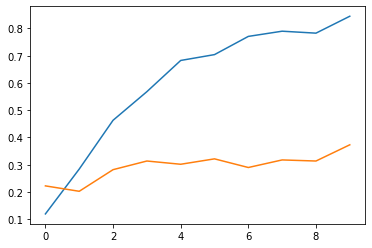

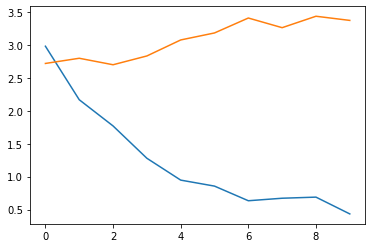

In [16]:
train_acc = history_1.history['accuracy']
val_acc = history_1.history['val_accuracy']
plt.plot(train_acc, 'C0')
plt.plot(val_acc, 'C1')
plt.show()

train_acc = history_1.history['loss']
val_acc = history_1.history['val_loss']
plt.plot(train_acc, 'C0')
plt.plot(val_acc, 'C1')
plt.show()

In [17]:
model = models.Sequential()
model.add(layers.Conv3D(10, (4, 4, 2), activation='relu', input_shape=(k, k, x4, 1)))
model.add(layers.MaxPooling3D((2, 2, 1)))
model.add(layers.Conv3D(25, (5, 5, 4), activation='sigmoid'))
model.add(layers.MaxPooling3D((2, 2, 2)))
#model.add(layers.Conv3D(20, (6, 6, 2), activation='relu'))
#model.add(layers.MaxPooling3D((3, 3, 1)))
model.add(layers.Flatten())
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d (Conv3D)             (None, 42, 42, 17, 10)    330       
                                                                 
 max_pooling3d (MaxPooling3D  (None, 21, 21, 17, 10)   0         
 )                                                               
                                                                 
 conv3d_1 (Conv3D)           (None, 17, 17, 14, 25)    25025     
                                                                 
 max_pooling3d_1 (MaxPooling  (None, 8, 8, 7, 25)      0         
 3D)                                                             
                                                                 
 flatten (Flatten)           (None, 11200)             0         
                                                                 
Total params: 25,355
Trainable params: 25,355
Non-traina

In [18]:
model.add(Dropout(0.4))
model.add(layers.Dense(200, activation='relu'))
model.add(Dropout(0.4))
model.add(layers.Dense(21, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d (Conv3D)             (None, 42, 42, 17, 10)    330       
                                                                 
 max_pooling3d (MaxPooling3D  (None, 21, 21, 17, 10)   0         
 )                                                               
                                                                 
 conv3d_1 (Conv3D)           (None, 17, 17, 14, 25)    25025     
                                                                 
 max_pooling3d_1 (MaxPooling  (None, 8, 8, 7, 25)      0         
 3D)                                                             
                                                                 
 flatten (Flatten)           (None, 11200)             0         
                                                                 
 dropout (Dropout)           (None, 11200)             0

In [19]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
LOG_DIR = os.path.join(os.getcwd(), 'logs')

os.chdir(os.getcwd())

tb = TensorBoard(LOG_DIR)

weights_dir = 'weights/' + model.name + \
            '-{epoch:02d}-{loss:.2f}'
chkpt = ModelCheckpoint(filepath=weights_dir, monitor='accuracy', save_best_only=True, save_weights_only=True, mode='auto', save_freq=1)

early_stop = EarlyStopping(monitor='val_acc', min_delta=0, patience=3)

history = model.fit(X_img_train, Y_train , epochs=15, 
                    batch_size=3, validation_data=(X_img_test, Y_test), callbacks=[tb, chkpt])

Epoch 1/15
140/140 [==============================] - 47s 330ms/step - loss: 3.8228 - accuracy: 0.0740 - val_loss: 2.9106 - val_accuracy: 0.1389
Epoch 2/15
140/140 [==============================] - 43s 305ms/step - loss: 2.6111 - accuracy: 0.1766 - val_loss: 2.4405 - val_accuracy: 0.3135
Epoch 3/15
140/140 [==============================] - 41s 296ms/step - loss: 2.2063 - accuracy: 0.3246 - val_loss: 2.1969 - val_accuracy: 0.3889
Epoch 4/15
140/140 [==============================] - 43s 305ms/step - loss: 1.8786 - accuracy: 0.4224 - val_loss: 1.9221 - val_accuracy: 0.5278
Epoch 5/15
140/140 [==============================] - 42s 297ms/step - loss: 1.3842 - accuracy: 0.5394 - val_loss: 1.6602 - val_accuracy: 0.5476
Epoch 6/15
140/140 [==============================] - 43s 306ms/step - loss: 1.1374 - accuracy: 0.6253 - val_loss: 1.6106 - val_accuracy: 0.5833
Epoch 7/15
140/140 [==============================] - 42s 297ms/step - loss: 1.0701 - accuracy: 0.6396 - val_loss: 1.7172 - val_ac

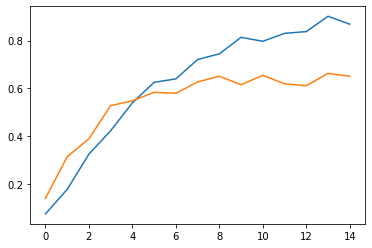

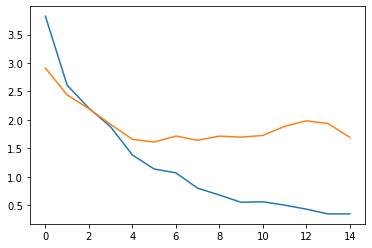

In [20]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(train_acc, 'C0')
plt.plot(val_acc, 'C1')
plt.show()

train_acc = history.history['loss']
val_acc = history.history['val_loss']
plt.plot(train_acc, 'C0')
plt.plot(val_acc, 'C1')
plt.show()

In [21]:
model.evaluate(X_img_test, Y_test)

8/8 [==============================] - 3s 310ms/step - loss: 1.6947 - accuracy: 0.6508


[1.6947277784347534, 0.6507936716079712]

C:\Users\jagat\AppData\Local\Temp/ipykernel_16672/2468046188.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_xticklabels(class_labels, rotation = 90)
C:\Users\jagat\AppData\Local\Temp/ipykernel_16672/2468046188.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_yticklabels(class_labels)


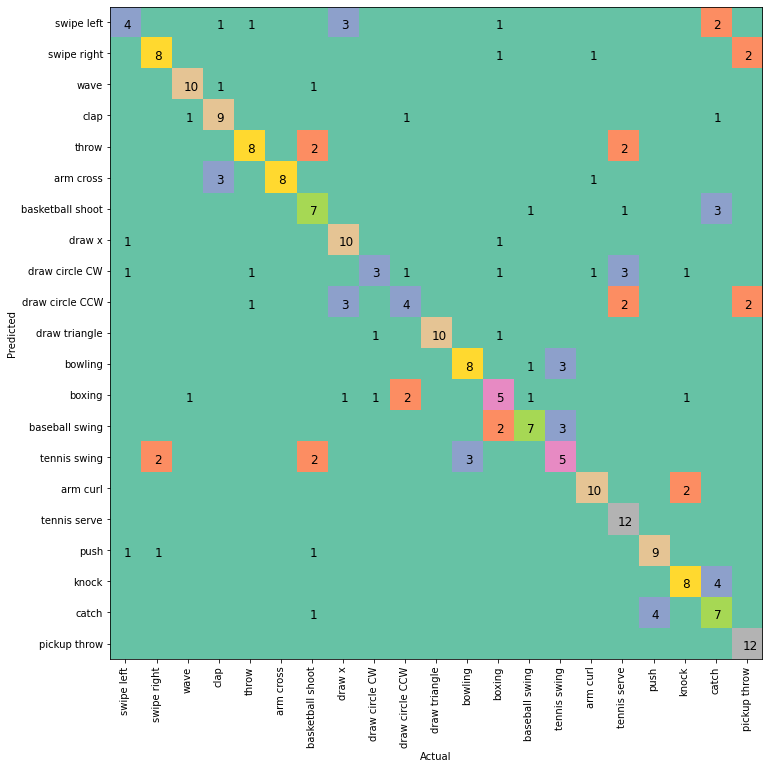

In [22]:
pred_1 = np.argmax(model.predict(X_img_test), axis = -1)
confusion_1 = confusion_matrix(np.argmax(Y_test, axis = -1), pred_1)
NUM_LABELS = 21

f, axes = plt.subplots(1,1, figsize = (12,12))
axes.set_xlabel('Actual')
axes.set_ylabel('Predicted')
axes.grid(False)
axes.set_xticklabels(class_labels, rotation = 90)
axes.set_yticklabels(class_labels)
axes.set_yticks(list(range(NUM_LABELS)))
axes.set_xticks(list(range(NUM_LABELS)))
plt.imshow(confusion_1, cmap=plt.cm.Set2, interpolation='nearest')

for i, cas in enumerate(confusion_1):
    for j, count in enumerate(cas):
        if count > 0:
            xoff = .07 * len(str(count))
            plt.text(j-xoff, i+.2, int(count), fontsize=12, color='black')